In [2]:
'''Sentiment of the tweets from September regarding the 2020 elections'''

'Sentiment of the tweets from October regarding the 2020 elections'

In [1]:
import sys
import os
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
import json


In [2]:
path = r'C:\Users\m216126\Documents\capstoneStuff\twitterCapture\captures\september'      # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
li = []
for file in all_files:
    df = pd.read_csv(file, index_col = None, header=0)
    li.append(df)

In [3]:
# Naming the columns

for i in range(len(li)):
    li[i].columns = ['Date','id','tweet','tweet_info','metadata']

In [4]:
## Concatenate all the files into a single dataset

frames = []

for i in range(len(li)):
    frames.append(li[i])
tweet_dataset = pd.concat(frames, ignore_index=True)

In [5]:
tweet_dataset.shape 

(468447, 5)

In [6]:
tweet_dataset.tail(200)

,Date,id,tweet,tweet_info,metadata
468247,2020-09-10 00:59:38,1303860651820044290,b'RT @AngusRockford: @nakashimae @juliettekayy...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468248,2020-09-10 00:59:38,1303860651807383552,b'RT @realDonaldTrump: Fake News asks why I br...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468249,2020-09-10 00:59:38,1303860651752738822,b'RT @mariaressa: Trump admits to playing down...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468250,2020-09-10 00:59:38,1303860651740270594,"b""RT @PellinoreWendy: Schiff told Senate Trump...",User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468251,2020-09-10 00:59:38,1303860651723558913,b'RT @cajun4trump: TRUMP BANNED TRAVEL TO AND ...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
...,...,...,...,...,...
468442,2020-09-10 00:59:36,1303860643523567617,"b""RT @JRinPueblo: Kamala Harris Calls For \xe2...",User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468443,2020-09-10 00:59:36,1303860643469160448,"b'RT @glennkirschner2: In January, Trump knew ...",User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468444,2020-09-10 00:59:36,1303860643427123205,b'@KamalaHarris @JoeBiden Trump is scared of y...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
468445,2020-09-10 00:59:36,1303860643364253698,b'RT @karentravers: NEW: just asked @JoeBiden ...,User(_api=<tweepy.api.API object at 0x110ed0bd...,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [7]:
# Cleaning Up the tweets

searched_tweets = []

for i in range(0,int(tweet_dataset.shape[0])):
    try:
        if tweet_dataset['tweet'][i] != None: 
            tweet = re.sub('[^a-zA-Z0-9]', ' ', str(tweet_dataset['tweet'][i]))
            tweet = re.sub("b'", '', tweet)
            tweet = re.sub('https', '', tweet)
            tweet = tweet.split()
            for j in range(len(tweet)):
                if len(tweet[j]) <= 3:
                    tweet[j] = ''
                elif (len(tweet[j]) == 4) and (tweet[j][0]=='x'):
                    tweet[j] = ''
                elif (len(tweet[j]) == 5) and (tweet[j][0]=='x'):
                    tweet[j] = ''
            tweet = ' '.join(tweet)
            searched_tweets.append(tweet)
    except:
        continue

In [8]:
print(len(searched_tweets))

468447


In [9]:
#Sentiment Analysis Report of all the tweets from november with hashtags related to the elections

#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    try:
        analysis = TextBlob(tweet)
        if analysis.sentiment[0]>0:
           pos = pos +1
        elif analysis.sentiment[0]<0:
           neg = neg + 1
        else:
           neu = neu + 1
    except:
        continue
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  142856
Total Negative =  102300
Total Neutral =  223291


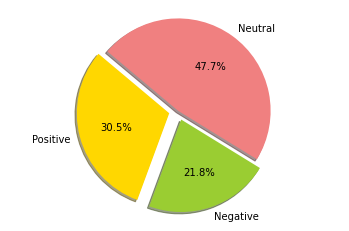

In [10]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()